# NEURAL NETWORK

### Alok Sawant


Firstly, let's select TensorFlow version 2.x in colab

In [2]:
#%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

## Import dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
from tensorflow import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from sklearn.model_selection import StratifiedKFold
%matplotlib inline
#Test Train Split
from sklearn.model_selection import train_test_split
#Feature Scaling library
from sklearn.preprocessing import StandardScaler
#import pickle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model

In [4]:
# Initialize the random number generator
import random
seed=6
random.seed(seed)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("Part- 1,2&3 - Signal.csv")
data.shape

(1599, 12)

The given dataset contains 1599 rows and 12 columns 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The given data contains all numerical values 

In [7]:
data.isnull().sum() # Check for null values in data

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

 There are no null value entries in the given data set 

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


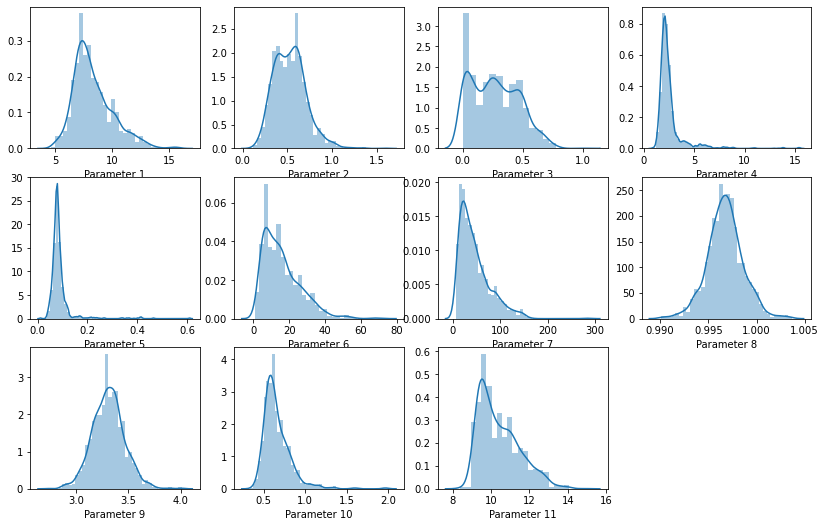

In [10]:
col= ['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4', 'Parameter 5','Parameter 6','Parameter 7', 'Parameter 8', 'Parameter 9', 
      'Parameter 10', 'Parameter 11'] # Not selecting categorica data columns 
i=4
j=0
plt.figure(figsize=(14,12))
for k in col :
    plt.subplot(i,i,i*(j+1)//i)
    sns.distplot(data[k])
    j=j+1
plt.show()

Most of the parameters in the given dataset are positively skewed except for parameter 8 and parameter 9 which looks uniformaly distributed 

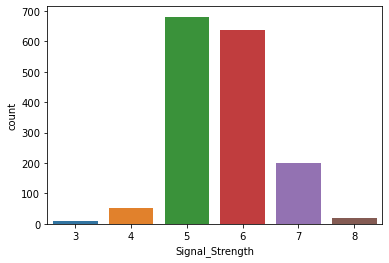

In [11]:
sns.countplot(data['Signal_Strength'])    # Distibution 'Signal_Strength'
plt.show()

For Singnal strength in the given dataset count of class 5 is the higest  

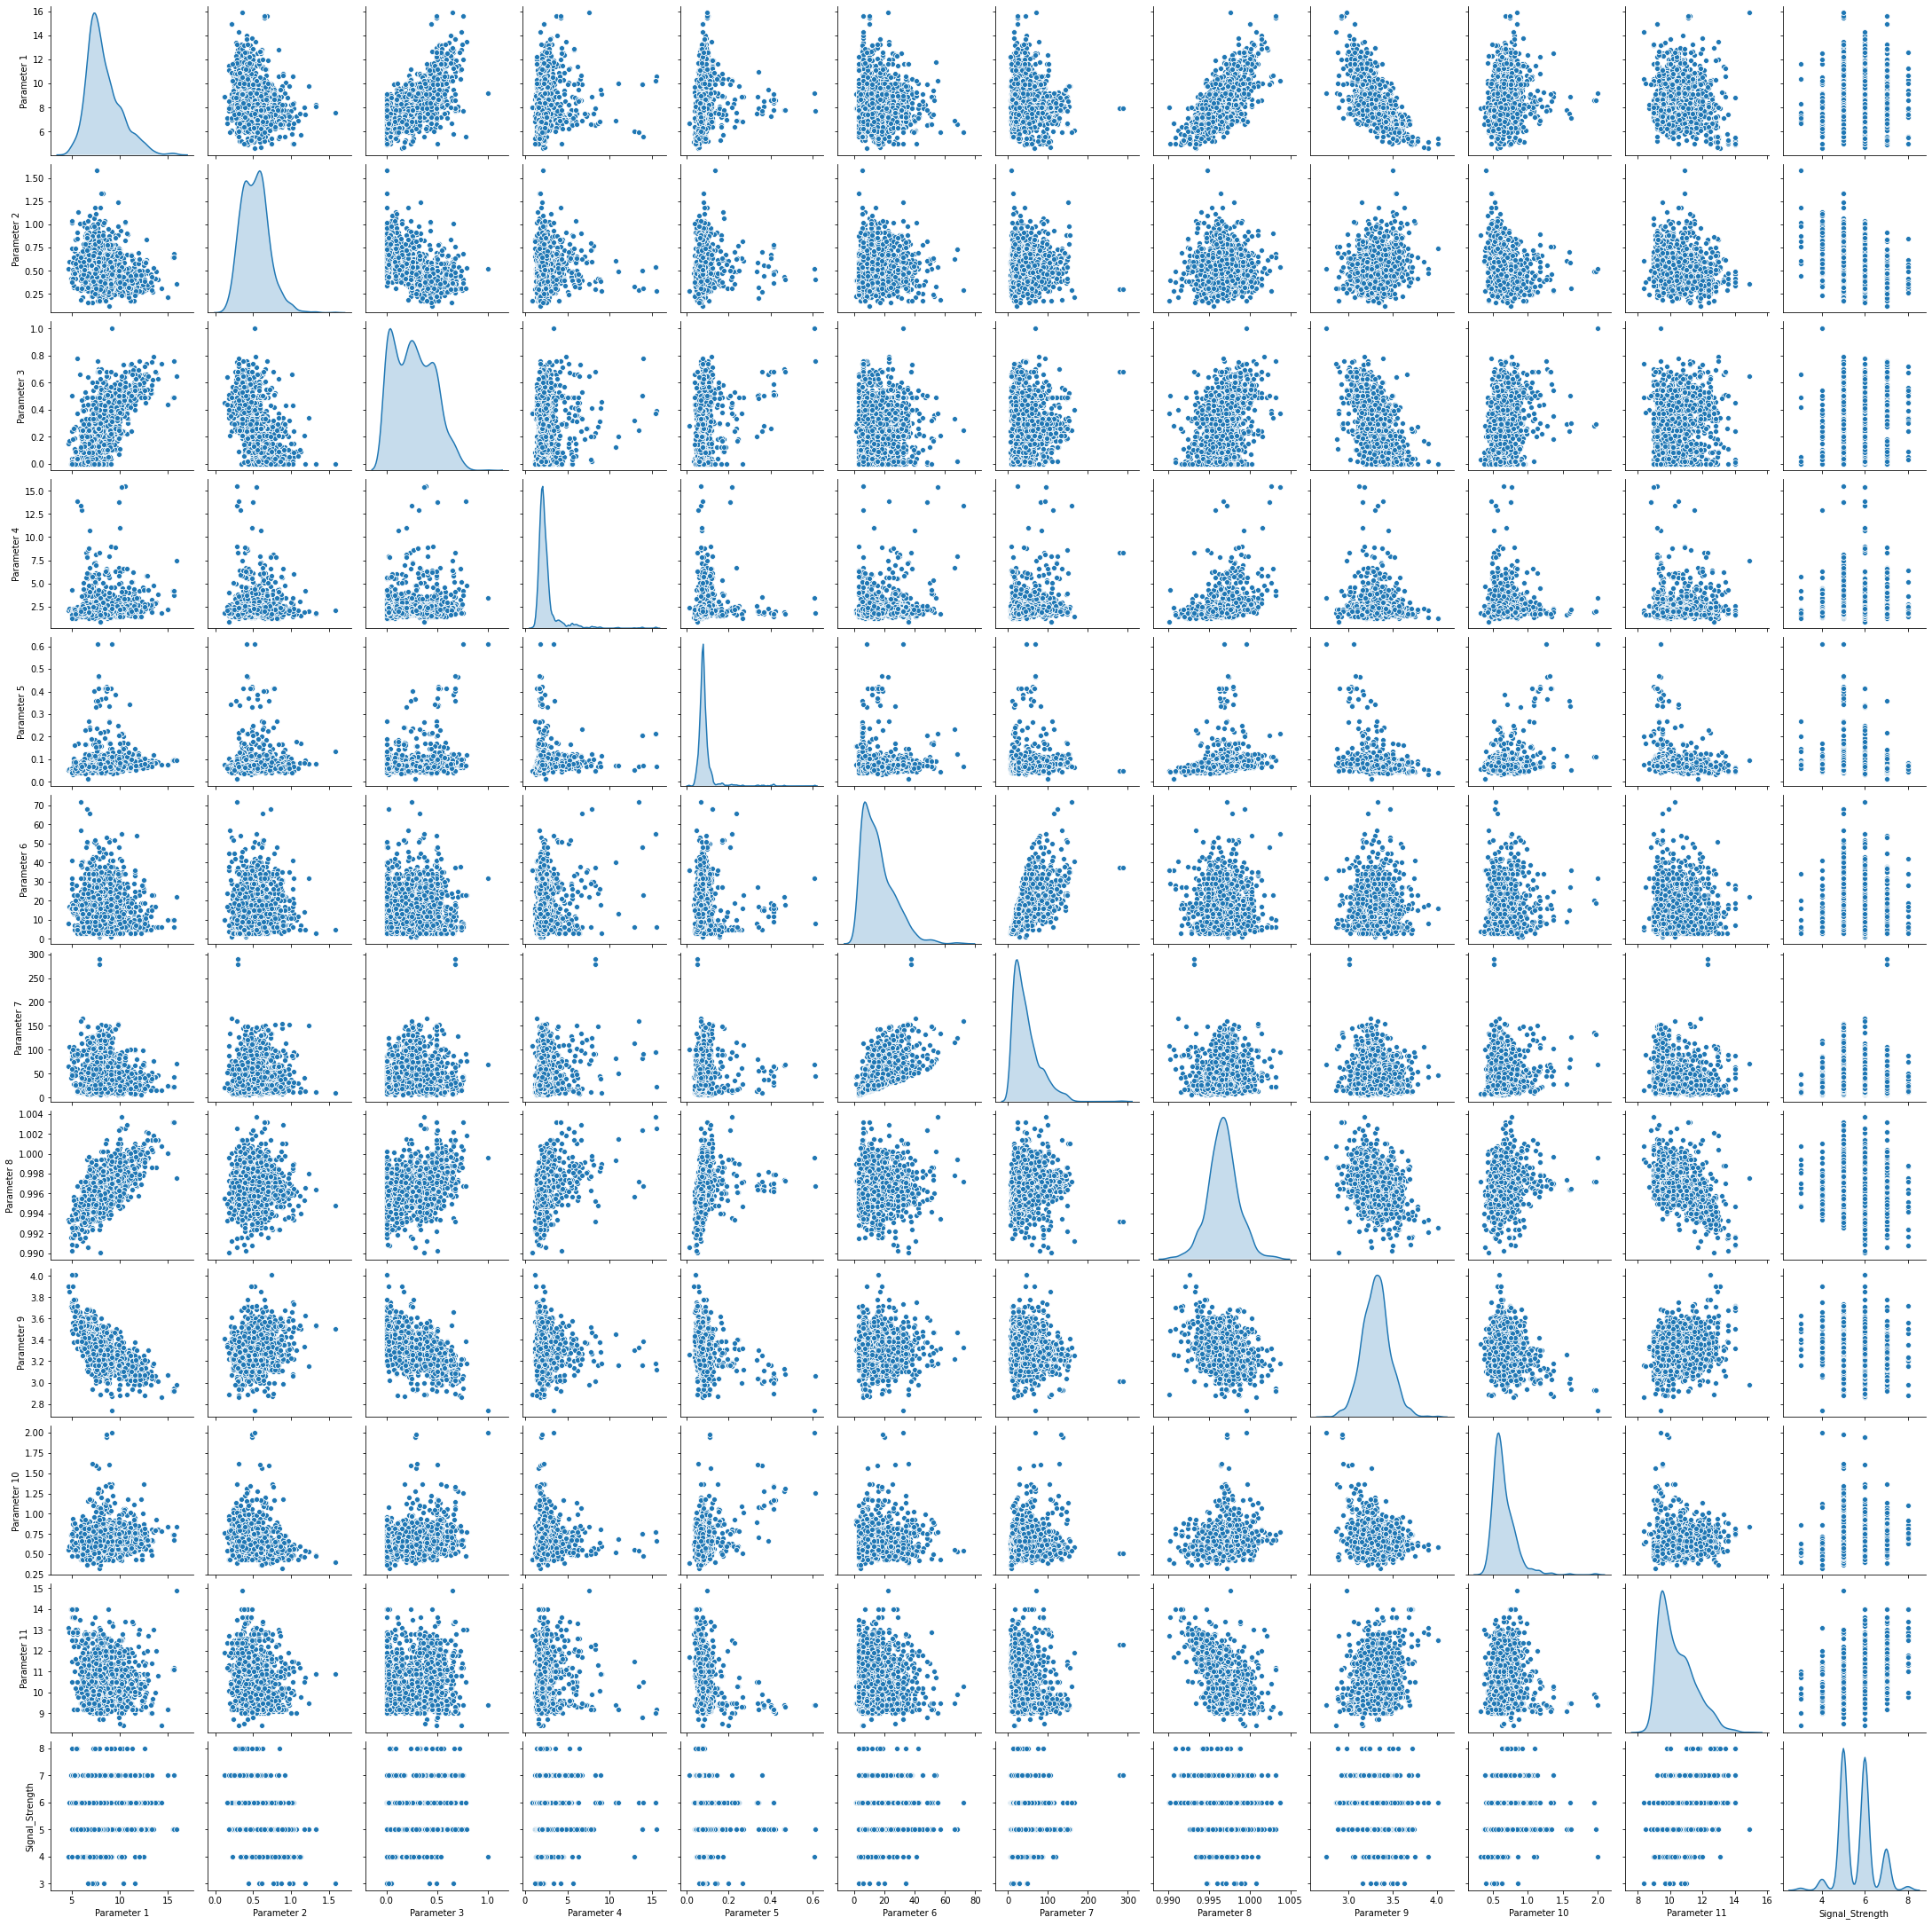

In [12]:
sns.pairplot(data,diag_kind='kde')
plt.show()

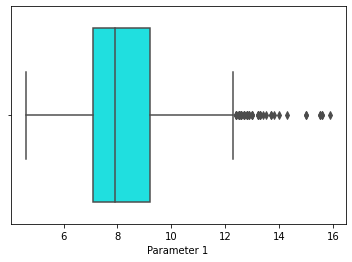

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker, Upper Whisker :  3.95 , 12.349999999999998
Out of  1599  rows in data, number of outliers are: 49


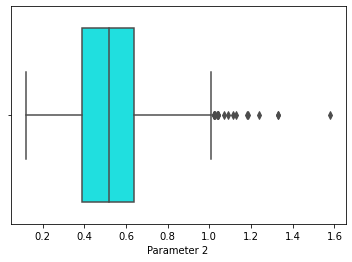

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Lower Whisker, Upper Whisker :  0.015000000000000013 , 1.0150000000000001
Out of  1599  rows in data, number of outliers are: 19


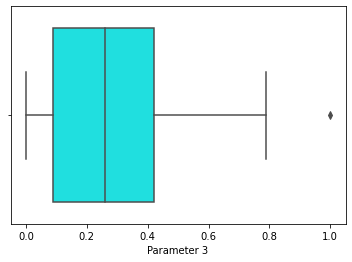

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.42
IQR is: 0.32999999999999996
Lower Whisker, Upper Whisker :  -0.4049999999999999 , 0.9149999999999999
Out of  1599  rows in data, number of outliers are: 1


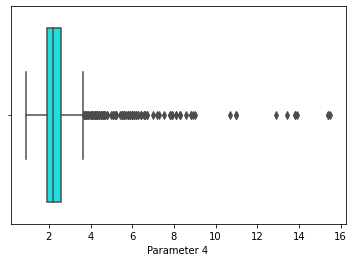

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker, Upper Whisker :  0.8499999999999996 , 3.6500000000000004
Out of  1599  rows in data, number of outliers are: 155


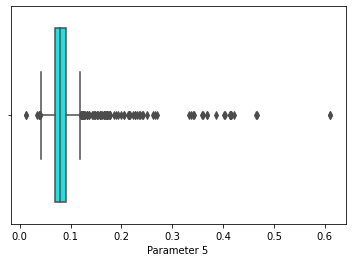

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.09
IQR is: 0.01999999999999999
Lower Whisker, Upper Whisker :  0.04000000000000002 , 0.11999999999999998
Out of  1599  rows in data, number of outliers are: 112


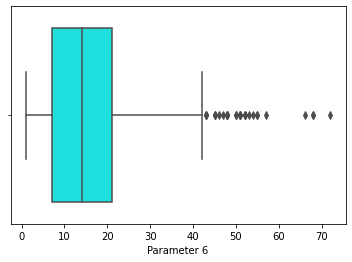

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker, Upper Whisker :  -14.0 , 42.0
Out of  1599  rows in data, number of outliers are: 30


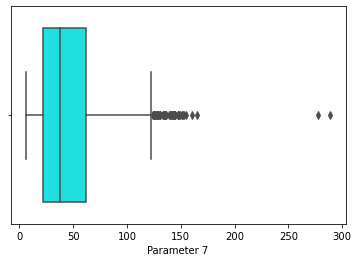

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  62.0
IQR is: 40.0
Lower Whisker, Upper Whisker :  -38.0 , 122.0
Out of  1599  rows in data, number of outliers are: 55


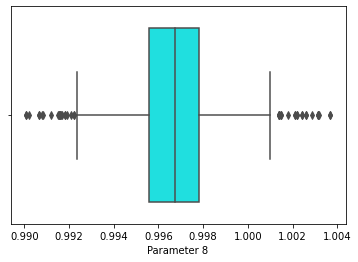

Boxplot of  Parameter 8
Q1 is :  0.9956
Q2 is :  0.99675
Q3 is :  0.9978349999999999
IQR is: 0.002234999999999876
Lower Whisker, Upper Whisker :  0.9922475000000002 , 1.0011874999999997
Out of  1599  rows in data, number of outliers are: 45


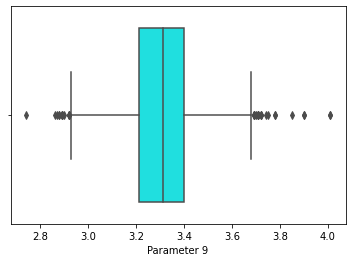

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker, Upper Whisker :  2.925 , 3.6849999999999996
Out of  1599  rows in data, number of outliers are: 35


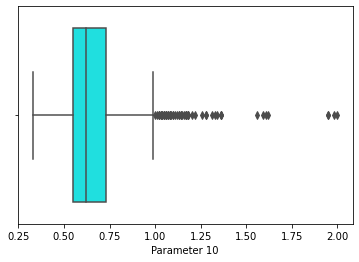

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Lower Whisker, Upper Whisker :  0.28000000000000014 , 0.9999999999999999
Out of  1599  rows in data, number of outliers are: 59


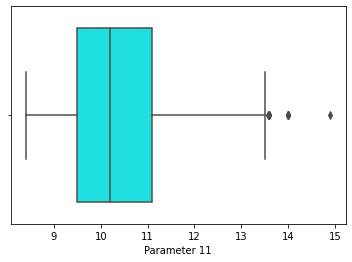

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Lower Whisker, Upper Whisker :  7.1000000000000005 , 13.5
Out of  1599  rows in data, number of outliers are: 13


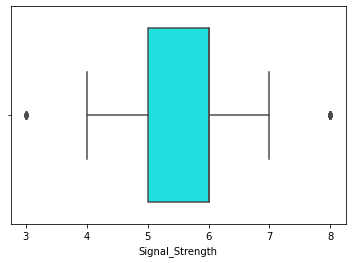

Boxplot of  Signal_Strength
Q1 is :  5.0
Q2 is :  6.0
Q3 is :  6.0
IQR is: 1.0
Lower Whisker, Upper Whisker :  3.5 , 7.5
Out of  1599  rows in data, number of outliers are: 28


In [13]:
# Checking the presence of outliers
l = len(data)
col = list(data.columns)
#col.remove('condition')
for i in np.arange(len(col)):
    sns.boxplot(x= data[col[i]], color='cyan')
    plt.show()
    print('Boxplot of ',col[i])
    #calculating the outiers in attribute 
    Q1 = data[col[i]].quantile(0.25)
    Q2 = data[col[i]].quantile(0.50)
    Q3 = data[col[i]].quantile(0.75) 
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)    
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (data[col[i]] < (Q1 - 1.5 *IQR)) |(data[col[i]] > (Q3 + 1.5 * IQR))
    print('Out of ',l,' rows in data, number of outliers are:',bools.sum())   #calculating the number of outliers

In the given dataset parameter 4 contains highest number (i.e 155) of outliners. 

In [14]:
#  function to treat outliers
def detect_treate_outliers(df,operation):
    cols=[]
    IQR_list=[]
    lower_boundary_list=[]
    upper_boundary_list=[]
    outliers_count=[]
    for col in df.columns:
        #print('col',col)
        if((df[col].dtype =='int64' or df[col].dtype =='float64') and (col != 'HR')):
            #print('Inside if')
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (1.5 * IQR)
            upper_boundary = df[col].quantile(0.75) + (1.5 * IQR)
            up_cnt = df[df[col]>upper_boundary][col].shape[0]
            #print('Upper count=',up_cnt)
            lw_cnt = df[df[col]<lower_boundary][col].shape[0]
            #print('lower count=',lw_cnt)
            if(up_cnt+lw_cnt) > 0:
                cols.append(col)
                IQR_list.append(IQR)
                lower_boundary_list.append(lower_boundary)
                upper_boundary_list.append(upper_boundary)
                outliers_count.append(up_cnt+lw_cnt)
                if operation == 'update':
                    df.loc[df[col] > upper_boundary,col] = upper_boundary
                    df.loc[df[col] < lower_boundary,col] = lower_boundary
                else:
                    pass
            else:
                pass
   #print('cols=',cols)
   # print('IQR_list=',IQR_list)
   # print('lower_boundary_list=',lower_boundary_list)
   # print('upper_boundary_list=',upper_boundary_list)
   # print('outliers_count=',outliers_count)
    ndf = pd.DataFrame(list(zip(cols,IQR_list,lower_boundary_list,upper_boundary_list,outliers_count)),columns=['Features','IQR','Lower Boundary','Upper Boundary','Outlier Count'])
    #print('Data=',ndf)
    #print('Columns having outliers=',cols)
    if operation == 'update':
        return (len(cols),df)
    else:
        return (len(cols),ndf)

In [15]:
#Removing outliers by replacing the data below lower whisker with it and above upper whisker with it respectively.
count,df=detect_treate_outliers(data,'update')
if count>0:
    data=df

## Finding corelations between the different features in the data

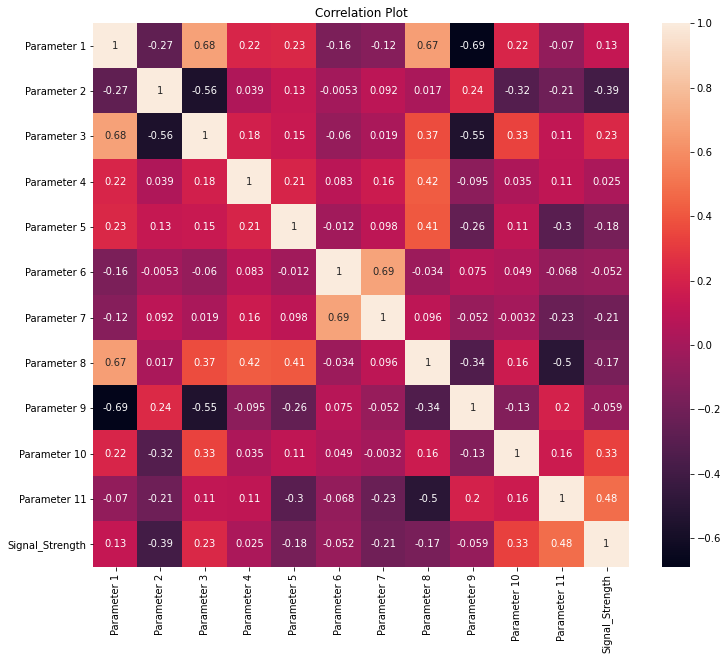

In [16]:
corr = data.corr()

# Plotting corelations using heatmap
plt.figure(figsize=(12,10))
plt.title("Correlation Plot")
sns.heatmap(corr, annot=True)
plt.show()

From the aboove plotted heat map it can be seen that the parameter 1 in the given dataset is highly correlated with parameter 3, 8 and 9. Similarly, parameter 6 is highly corerelated with parameter 7. Since, the correalation is not too high i.e. above 0.8 hence not dropping any features in the dataset

## Model building 

- The Sequential model is a linear stack of layers.
- The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.
- You can also simply add layers via the .add() method

In [17]:
X = data.drop("Signal_Strength", axis=1)
y = data['Signal_Strength']

In [18]:
from sklearn.model_selection import train_test_split

# splitting to create test data
X_vtrain, X_test, y_vtrain, y_test = train_test_split(X, y, test_size=.30, random_state=seed)

In [19]:
X_vtrain.shape

(1119, 11)

In [20]:
# splitting to create training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_vtrain, y_vtrain, test_size=.20, random_state=seed)

In [21]:
X_train.shape

(895, 11)

In [22]:
# Initialize Sequential model
model_reg = tensorflow.keras.models.Sequential()

# Normalize input data
model_reg.add(tensorflow.keras.layers.BatchNormalization(input_shape=(11,)))

# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model_reg.add(tensorflow.keras.layers.Dense(1))

### Compile the model
- Here we configure the model for training
- We will specify an optimizer and a loss function

In [23]:
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
model_reg.compile(optimizer='sgd', loss='mse')

### Fit the model
- .fit() trains the model for a fixed number of epochs (iterations on a dataset)
- An epoch is an iteration over the entire x and y data provided

In [24]:
model_reg.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100, batch_size=10)

Epoch 1/100
90/90 [==============================] - 1s 3ms/step - loss: 10.2371 - val_loss: 2.1164
Epoch 2/100
90/90 [==============================] - 0s 1ms/step - loss: 0.6715 - val_loss: 0.4737
Epoch 3/100
90/90 [==============================] - 0s 1ms/step - loss: 0.5270 - val_loss: 0.3959
Epoch 4/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4664 - val_loss: 0.3777
Epoch 5/100
90/90 [==============================] - 0s 948us/step - loss: 0.4937 - val_loss: 0.3696
Epoch 6/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4928 - val_loss: 0.4042
Epoch 7/100
90/90 [==============================] - 0s 942us/step - loss: 0.4490 - val_loss: 0.3436
Epoch 8/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4451 - val_loss: 0.3686
Epoch 9/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4310 - val_loss: 0.3320
Epoch 10/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4470 - val_loss: 0.3449
Epoc

In [25]:
# save the model
model_reg.save("model_reg.h5") #using h5 extension

In [26]:
# load the model
model_rr = load_model('model_reg.h5')

In [27]:
y_pred = model_rr.predict(X_test)

In [28]:
print(y_pred[0])
print(y_pred[1])
print(y_pred[2])
print(y_pred[3])
print(y_pred[4])

[6.676124]
[6.2846265]
[6.0023255]
[5.4514027]
[5.957287]


In [29]:
print(y_test.head())

477     6.0
1135    6.0
911     6.0
302     5.0
649     6.0
Name: Signal_Strength, dtype: float64


In [30]:
score_r = r2_score(y_test,y_pred)
print(score_r)

0.3692500654575557


In [31]:
#summary of regression model
model_rr.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 11)                44        
_________________________________________________________________
dense (Dense)                (None, 1)                 12        
Total params: 56
Trainable params: 34
Non-trainable params: 22
_________________________________________________________________


## Part - 2 

In [32]:
# counting the number of classes in output
data['Signal_Strength'].value_counts()

5.0    681
6.0    638
7.0    199
4.0     53
7.5     18
3.5     10
Name: Signal_Strength, dtype: int64

In [33]:
X.shape

(1599, 11)

In [34]:
y.shape

(1599,)

In [35]:
yc = to_categorical(y, num_classes=8)

In [36]:
# splitting data for test of categorial 
Xcv_train, Xc_test, ycv_train, yc_test = train_test_split(X, yc, test_size=.30, random_state=seed)
print("Shape of y_train:", ycv_train.shape)
print("One value of y_train:", ycv_train[0])

Shape of y_train: (1119, 8)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0.]


In [37]:
# splitting data for  train and validation of categorial 
Xc_train, Xc_val, yc_train, yc_val = train_test_split(Xcv_train, ycv_train, test_size=.20, random_state=seed)
print("Shape of y_train:", yc_train.shape)
print("One value of y_train:", yc_train[0])

Shape of y_train: (895, 8)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0.]


In [38]:
model_class = Sequential()
model_class.add(Dense(11, activation='relu'))
model_class.add(Dense(8, activation='relu'))
model_class.add(Dense(8, activation='softmax'))

In [39]:
# Compile the model
model_class.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model_class.fit(x=Xc_train, y=yc_train, batch_size=20, epochs=100, validation_data=(Xc_val, yc_val))

Epoch 1/100
45/45 [==============================] - 0s 4ms/step - loss: 2.7368 - accuracy: 0.3325 - val_loss: 1.2905 - val_accuracy: 0.5045
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 1.3267 - accuracy: 0.4348 - val_loss: 1.2949 - val_accuracy: 0.3527
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 1.2341 - accuracy: 0.4117 - val_loss: 1.0734 - val_accuracy: 0.5536
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1890 - accuracy: 0.4615 - val_loss: 1.2402 - val_accuracy: 0.3482
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1648 - accuracy: 0.4768 - val_loss: 1.0574 - val_accuracy: 0.5402
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1726 - accuracy: 0.4571 - val_loss: 1.0897 - val_accuracy: 0.4241
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1755 - accuracy: 0.4625 - val_loss: 1.0500 - val_accuracy: 0.5402
Epoch 8/100
4

Epoch 59/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1110 - accuracy: 0.5016 - val_loss: 1.0412 - val_accuracy: 0.4866
Epoch 60/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1077 - accuracy: 0.4847 - val_loss: 1.0868 - val_accuracy: 0.4509
Epoch 61/100
45/45 [==============================] - 0s 2ms/step - loss: 1.0845 - accuracy: 0.4878 - val_loss: 1.0564 - val_accuracy: 0.4688
Epoch 62/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1093 - accuracy: 0.5021 - val_loss: 1.0329 - val_accuracy: 0.5089
Epoch 63/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1167 - accuracy: 0.4928 - val_loss: 1.1191 - val_accuracy: 0.4420
Epoch 64/100
45/45 [==============================] - 0s 2ms/step - loss: 1.1233 - accuracy: 0.4812 - val_loss: 1.0467 - val_accuracy: 0.5223
Epoch 65/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1287 - accuracy: 0.4699 - val_loss: 1.0561 - val_accuracy: 0.4777
Epoch 

In [40]:
# save the model
model_class.save("model_class.h5") #using h5 extension

In [41]:
# load the model
model_cl = load_model('model_class.h5')

In [42]:
# calculate score of training data
score = model_cl.evaluate(Xc_train, yc_train, verbose=0)
print(score)

[1.0903608798980713, 0.5027933120727539]


In [43]:
# score of test data
score_t = model_cl.evaluate(Xc_test, yc_test, verbose=0)
print( score_t)

[1.015678882598877, 0.5520833134651184]


In [44]:
#summary of classification model
model_cl.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
Total params: 300
Trainable params: 300
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Filename: h_layout.py

"""Horizontal layout example."""

import sys

from PyQt5.QtWidgets import QApplication
from PyQt5.QtWidgets import QHBoxLayout
from PyQt5.QtWidgets import QPushButton
from PyQt5.QtWidgets import QWidget

app = QApplication(sys.argv)
window = QWidget()
window.setWindowTitle('Neural Network')
layout = QHBoxLayout()
layout.addWidget(QPushButton('Left'))
layout.addWidget(QPushButton('Center'))
layout.addWidget(QPushButton('Right'))
window.setLayout(layout)
window.show()
sys.exit(app.exec_())

In [9]:
import PySimpleGUI as sg

sg.ChangeLookAndFeel('SystemDefault')

form = sg.FlexForm('Neural Network', default_element_size=(80, 1))

layout = [
    [sg.Text('Neural Network', size=(15, 1), font=("Helvetica", 25))],
    [sg.Text('Step 1 File Name'),sg.InputText('Signal.csv', size=(15, 1),key='file_name'),sg.FolderBrowse(), sg.B("Import Data"),sg.InputText('Done', size=(15, 1))],
    [sg.Text('Step 2 Target Colummn'),sg.InputText('Signal_Srength', size=(15, 1)), sg.B("Import Target"),sg.InputText('Found', size=(15, 1))],  
    [sg.Text('Step 3 Neural Network Regressor')],
    [sg.Text('Regressor'),sg.B("Train"),sg.InputText('Network Trained', size=(15, 1))],
    [sg.Text('Pickle'),sg.B("Run"),sg.InputText('Saved model to disk', size=(15, 1))],
    [sg.Text('Step 4 Neural Network Classifier')],
    [sg.Text('Classifier'),sg.B("Train"),sg.InputText('Network Trained', size=(15, 1))],
    [sg.Text('Pickle'),sg.B("Run"),sg.InputText('Saved model to disk', size=(15, 1))],
     ]

button, values = form.Layout(layout).Read()
sg.Popup(button, values)

while True:      
        # Read the Window    
    event, value = form.Read()      
        # Take appropriate action based on button      
    if event == 'Import Data':      
        read()   
    elif event == 'Import Target':      
        form.Close()      
    elif event =='Cancel'  or event is None:  
        form.Close()    
        break
        
def read():
    data = pd.read_csv("Part- 1,2&3 - Signal.csv")
    form.Close()
    
print(event, values[0], values[1], values[2], values[3], values[4], values[5], values[6])  

None Done Signal_Srength Found Network Trained Saved model to disk Network Trained Saved model to disk


## Part -4 

In [56]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')


In [57]:
import h5py

# Open the file as readonly
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [58]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:] 

In [59]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(42000, 32, 32) (42000,)
(18000, 32, 32) (18000,)


In [60]:
class_names = '0 1 2 3 4 5 6 7 8 9'.split(' ')

def show_random_examples(x,y,p):
  indices = np.random.choice(range(x.shape[0]),10,replace = False)

  x = x[indices]
  y = y[indices]
  p = p[indices]
  x = x.reshape(x.shape[0],32,32)

  plt.figure(figsize=(10,5))
  for i in range(10):
    plt.subplot(2,5,1+i)
    plt.imshow(x[i],cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
    col = 'green' if y[i] == p[i] else 'red'
    plt.xlabel(p[i] , color = col,fontsize = 20)
  plt.show()

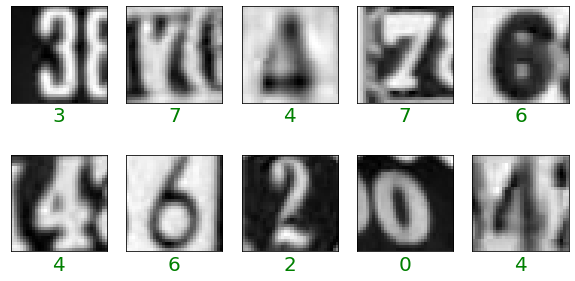

In [61]:
show_random_examples(X_train, y_train, y_train)

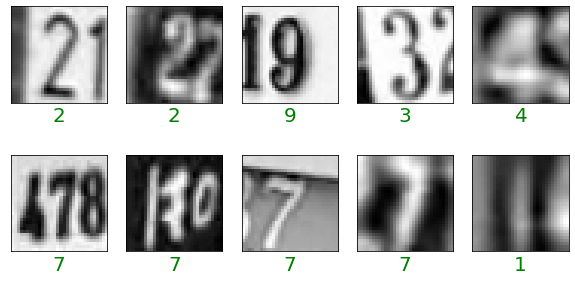

In [62]:
show_random_examples(X_test, y_test, y_test)

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
  def add_conv_block(model, num_filters):
    model.add(Conv2D(num_filters,3,activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filters,3, activation= 'relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.5))
    return model
  
  model = tf.keras.models.Sequential()
  model.add(Input(shape=(32,32,1)))

  model = add_conv_block(model, 32)
  model = add_conv_block(model, 64)
  model = add_conv_block(model, 128)

  model.add(Flatten())
  model.add(Dense(128, activation="relu"))
  model.add(Dense(10,activation = 'softmax'))

  model.compile(
      loss = 'categorical_crossentropy',
      optimizer = 'adam', metrics = ['accuracy']
  )
  return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        2

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

def train_and_test_loop1(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(784,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

In [23]:
h = model.fit(
    X_train/255.,y_train,
    validation_data = (X_test/255.,y_test),
    epochs=20,batch_size=32,
)


Epoch 1/20
1313/1313 [==============================] - 105s 79ms/step - loss: 2.3778 - accuracy: 0.1196 - val_loss: 0.8449 - val_accuracy: 0.7279
Epoch 2/20
1313/1313 [==============================] - 100s 76ms/step - loss: 0.7330 - accuracy: 0.7653 - val_loss: 0.3564 - val_accuracy: 0.8921
Epoch 3/20
1313/1313 [==============================] - 99s 75ms/step - loss: 0.4595 - accuracy: 0.8587 - val_loss: 0.3560 - val_accuracy: 0.8914
Epoch 4/20
1313/1313 [==============================] - 100s 76ms/step - loss: 0.3850 - accuracy: 0.8826 - val_loss: 0.3306 - val_accuracy: 0.9006
Epoch 5/20
1313/1313 [==============================] - 101s 77ms/step - loss: 0.3458 - accuracy: 0.8961 - val_loss: 0.2717 - val_accuracy: 0.9190
Epoch 6/20
1313/1313 [==============================] - 99s 75ms/step - loss: 0.3367 - accuracy: 0.8992 - val_loss: 0.5318 - val_accuracy: 0.8279
Epoch 7/20
1313/1313 [==============================] - 103s 78ms/step - loss: 0.3131 - accuracy: 0.9053 - val_loss: 0.2

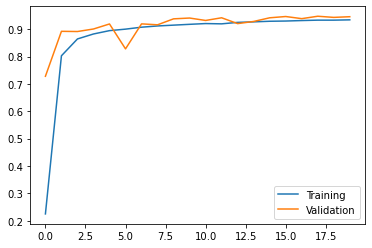

In [24]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)),accs, label = 'Training')
plt.plot(range(len(accs)), val_accs, label = 'Validation')
plt.legend()
plt.show() 

In [25]:
preds = model.predict(X_test/255.)

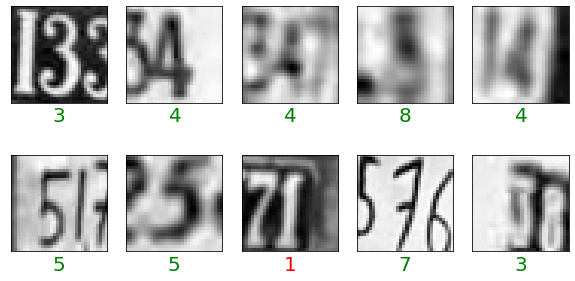

In [26]:
show_random_examples(X_test,y_test.argmax(axis = 1),preds.argmax(axis = 1))